## What is normalization ?
Transforming a distribution to closely follow a Normal distribution. 
## Why normalize ? 
Normal distribution gives a close approximation to a lot of naturally occuring phenomenon. Population metrics such as height, weights etc. usually follow a Normal distribution. As it is widely occuring distribution a lot of statistical tools are designed around it, such as statistical significance tests in hypothesis testing.
- A lot of characteristics of sum of individual events usually follow Normal distribution.
- In deep learning specifically, we use it for effective initialization of parameters, addressing covariance shift problem, speeding up the training & stabilizing it etc.

## Covariance shift ? 
In a deep neural network, a layers inputs distribution changes as the gradients get updated. This results in a layer constantly trying to re-adjust itself to the incoming distribution. This slows down convergence and in some cases results in unstable training. 

There are many ways to do the normalization in deep learning context. Some of the most used are described here.

In [115]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import os
from IPython.core.display import Image
from IPython.display import display
%matplotlib inline

### Loading a batch of images 

In [84]:
data_dir = '../data/sample_images/'
# Creating empty tensor of required shape & filling it with images
batch_images = torch.empty(4,3,128,128, dtype=torch.uint8)
for index, file in enumerate(os.listdir(data_dir)):
    batch_images[index,:,:,:] = torchvision.io.read_image(os.path.join(data_dir,file), mode= torchvision.io.ImageReadMode.RGB)

*Sample of Golden retriever dogs from Imagenet*

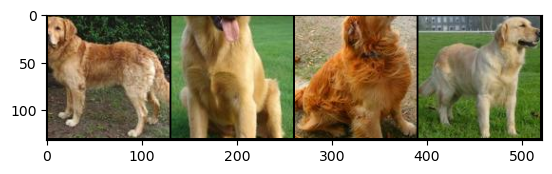

In [107]:
plt.imshow(torchvision.utils.make_grid(batch_images).permute(1,2,0))
plt.show();

### Batch normalization
- To reduce the covariance shift batch normalization is used.
- Batch normalization, normalizes feature maps from entire batch of images. For every feature dimension there is a single mean & single variance is calculated. Which is used to transform the traininng samples.
- At test time, a moving average of the batch means are maintained in the layer state dictionary, which is used to normalize test examples.
- Also has regularization effect. So usually dropout layers are not used along with batch normalization. 

#### Drawbacks 
- Ideally the mean & variance should be picked from the entire dataset, but it is impractical. So we do it over mini batches. This results in evolution of mean over the batches. If too much variation happened the moving averages lag behind, thus creating issues in inference time. 
- Not suited for online training cases, where updates happen for every training example. 

#### Computation procedure
- Given a batch of images of shape (B, C, H, W) -> Calculate mean from all values at spatial locations (H,W) across all training examples - N. You will have N * H * W values - take mean & variance of them, which gives normalization parameters for 1 channel / feature map.


<img src='../data/norm_images/batchnorm.png' alt="Batch normalization from paperswith code" width="200" height="200"></img>

In [127]:
# As batch normalization done over the C dimension, num_features = 3
# Another parameter momentum is used for weighing past observations while computing moving averages
batch_norm = torch.nn.BatchNorm2d(num_features=3)

In [128]:
batch_norm.state_dict()

OrderedDict([('weight', tensor([1., 1., 1.])),
             ('bias', tensor([0., 0., 0.])),
             ('running_mean', tensor([0., 0., 0.])),
             ('running_var', tensor([1., 1., 1.])),
             ('num_batches_tracked', tensor(0))])

*The state dictionary contains 3 Weights, 3 Biases. And also the running mean & variances for inference time computations*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


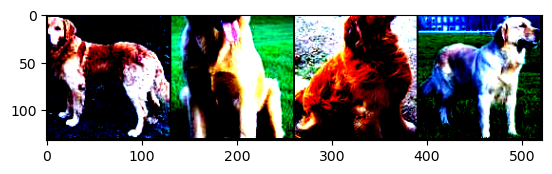

In [129]:
plt.imshow(torchvision.utils.make_grid(batch_norm(batch_images.float()),nrow=4).permute(1,2,0))
plt.show();

In [130]:
print("Updated State dictionary with the batch of 4 images.")
batch_norm.state_dict()

Updated State dictionary with the batch of 4 images.


OrderedDict([('weight', tensor([1., 1., 1.])),
             ('bias', tensor([0., 0., 0.])),
             ('running_mean', tensor([12.7867, 11.3175,  7.2296])),
             ('running_var', tensor([292.3382, 211.5744, 204.5163])),
             ('num_batches_tracked', tensor(1))])

Weight & bias gets updated as training progresses. They are initialized with no bias & unit weight.

### Instance normalization
- Instead of normalizing over a batch of inputs, instance normalization does it over each instance separately.
- Also known as contrast normalization as contrast information is smoothed over.
- Used in Image stylization, where style capture is the main concern and not the individual image characteristics. 
- As metrics are calculated at instance level, both training & testing times keep the same computation. 
#### Computaaation procedure
-Given a batch of images of share (B, C, H, W) -> take all the values from one training sample, for one channel / feature map and calculate mean & variance of it, which gives normalization parameters for 1 channel / feature map for 1 training example.

<img src='../data/norm_images/instance_norm.png' alt="Instance normalization from paperswith code" width="200" height="200"></img>

In [131]:
inst_norm = torch.nn.InstanceNorm2d(num_features=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


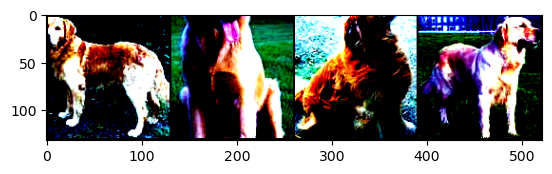

In [135]:
plt.imshow(torchvision.utils.make_grid(inst_norm(batch_images.float()),nrow=4).permute(1,2,0))
plt.show();

### Layer normalization
- Unlike batch & instance normalization techniques layer normalization, normalizes across all inputs to a hidden layer per training sample.
- Training & inference times remain the same. 
- Used in RNNs & transformer networks.

#### Computation procedure
- Given a batch of images of shape (B, C, H, W) - calculates mean & variance for 1 hidden layer. Take all values from all features maps / channels for 1 training example & calculate mean & variance from them, which gives normalizaiton parameters for 1 hidden layer for 1 training example.

<img src='../data/norm_images/layer_norm.png' alt="Layer normalization from paperswith code" width="400" height="200"></img>

In [136]:
layer_norm = torch.nn.LayerNorm(normalized_shape=[3,128,128])

In [139]:
layer_norm.state_dict()['weight'].shape

torch.Size([3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


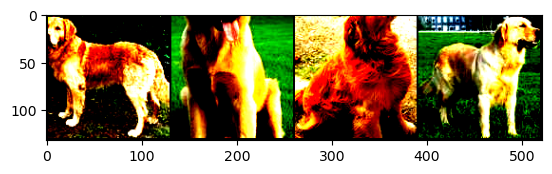

In [148]:
plt.imshow(torchvision.utils.make_grid(layer_norm(batch_images.float()),nrow=4).permute(1,2,0))

## References
- <a href="https://paperswithcode.com/method/layer-normalization">Layer normalization</a>
- <a href="https://paperswithcode.com/method/batch-normalization">Batch normalization</a>
- <a href="https://paperswithcode.com/method/instance-normalization">Instance normalization</a>